In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
budget_data = pd.read_csv('../data/cleaned_budgets.csv')
gross_data = pd.read_csv('../data/cleaned_movie_gross.csv')
movie_data = pd.read_csv('../data/cleaned_movies.csv')


In [46]:
#data = budget_data.merge(gross_data, on='movie_id').merge(movie_data, on='movie_id')
#data = budget_data.merge(gross_data, on='movie_data', how='left')
data = budget_data.merge(gross_data, left_on='movie', right_on='title')
data

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,return_ratio,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.83,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000,229024295,655945209,1.19,Justice League,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000,200074175,879620923,1.93,Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,68,2012-04-27,Sound of My Voice,135000,408015,429448,2.18,Sound of My Voice,FoxS,408000.0,NaN,2012
1238,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,24.75,Your Sister's Sister,IFC,1600000.0,NaN,2012
1239,80,2015-07-10,The Gallows,100000,22764410,41656474,415.56,The Gallows,WB (NL),22800000.0,20200000,2015
1240,86,2017-07-07,A Ghost Story,100000,1594798,2769782,26.70,A Ghost Story,A24,1600000.0,NaN,2017


In [47]:
#data_r_rated = data[data['rating'] == 'R']
#r_rated_profit = data_r_rated['profit'].mean()
data_rt = pd.read_csv('../data/cleaned_rt_info.csv')
data_r_rated = data_rt[data_rt['rating'] == 'R']


data_r_rated['box_office'].mean().round(2)

23231760.9

In [48]:
data_not_r = data_rt[(data_rt['rating'] != 'R') & (data_rt['rating'] != 'NR')]
data_not_r['box_office'].mean().round(2)

53306675.37

In [49]:
data_rt['rating'].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

In [50]:
data_rt = pd.read_csv('../data/cleaned_rt_info.csv')

data_r_rated = data_rt[data_rt['rating'] == 'R']
data_not_r = data_rt[(data_rt['rating'] != 'R') & (data_rt['rating'] != 'NR')]

r_rated_profit = data_r_rated['box_office'].mean().round(2)
non_r_rated_profit = data_not_r['box_office'].mean().round(2)


In [51]:
print(f'Non-R Rated Profit: {non_r_rated_profit}')
print(f'R Rated Profit: {r_rated_profit}')

Non-R Rated Profit: 53306675.37
R Rated Profit: 23231760.9


In [52]:
data_r_rated = data_rt[data_rt['rating'] == 'R']
r_genre_profit = data_r_rated.groupby('genre')['box_office'].mean().sort_values(ascending=False)
rating_df = data_rt.groupby('rating')['box_office'].mean().sort_values(ascending=False)


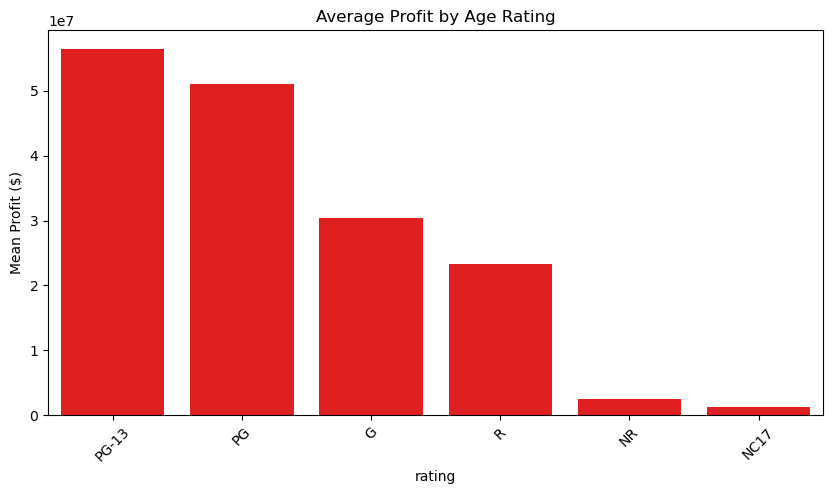

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_df.index, y=rating_df.values, color='red')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit ($)')
plt.title('Average Profit by Age Rating')
plt.show()
